# This is How to Improve an Imbalanced Dataset
-------------------------

When working with data in the real world, the issue of an imbalanced dataset comes up more often than you may think. An imbalanced dataset is when the data has significantly less data in a class, relative to the other classes present. For example, a dataset which is used for predicting diabetes, it wouldn't be rare to find 2 times more records of patients without diabetes than patients with diabetes. Why is this a problem? It's a problem because, in the example mentioned, our model can easily achieve 66% accuracy by always predicting the patient to not have diabetes. Yes, 66% accuracy isn't good, but because it's better than random (i.e., 50% in this case), it gives us this false sense that our model is actually learning something valuable, when in fact, it just learned to always predict the same thing.

Let's take a look at an example of an imbalanced dataset. For our example, we'll be using the Pima Indians Diabetes dataset. We're going to be re-running the code from our [last article which introduced PyTorch's DataLoader](https://cutt.ly/cg2ai-pytorch-dataloader-medium). In this article, I'll use the headings to describe the reused code, but if you want further explanation on it, then please refer to the article on [PyTorch's DataLoader](https://cutt.ly/cg2ai-pytorch-dataloader-medium).

### Import relevant libraries

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

### Read, split and scale data

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')

X = df[df.columns[:-1]]
y = df['Outcome']
X = X.values
y = torch.tensor(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = torch.tensor(scaler.transform(X_train))
X_test = torch.tensor(scaler.transform(X_test))

### Create our own class which inherits from PyTorch's Dataset class

In [ ]:
class PimaIndiansDiabetes(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.len = len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

### Create variables for our train and test data using our custom class above

In [ ]:
train_data = PimaIndiansDiabetes(X_train, y_train)
test_data = PimaIndiansDiabetes(X_test, y_test)

### Create reusable function and variables

In [ ]:
def accuracy(y_pred, y):
    return torch.sum((((y_pred>=0.5)+0).reshape(1,-1)==y)+0).item()/y.shape[0]

epochs = 1000+1
print_epoch = 100
lr = 1e-2
batch_size = 64

### Take advantage of PyTorch's DataLoader class

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

### Create the architecture for our neural network

In [ ]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hidden_linear = nn.Linear(8, 4)
        self.output_linear = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        hidden_output = self.sigmoid(self.hidden_linear(X))
        output = self.sigmoid(self.output_linear(hidden_output))
        return output

### Instantiate our Model class and set our loss and optimizer

In [ ]:
model = Model()
BCE = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

### Train our model

In [ ]:
test_result = [] 

for epoch in range(epochs):
    
    iteration_loss = 0.
    iteration_accuracy = 0.
    
    model.train()
    for i, data in enumerate(train_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())     
      
      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        

    if(epoch % print_epoch == 0):
        print('Train: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))    

    iteration_loss = 0.
    iteration_accuracy = 0.    

    model.eval()
    for i, data in enumerate(test_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())

      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      if(epoch == epochs-1):
        test_result.append((y, ((y_pred>=0.5)+0).reshape(1,-1)[0]))

    if(epoch % print_epoch == 0):
        print('Test: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train: epoch: 0 - loss: 0.68398; acc: 0.613
Test: epoch: 0 - loss: 0.68127; acc: 0.614
Train: epoch: 100 - loss: 0.62482; acc: 0.645
Test: epoch: 100 - loss: 0.61739; acc: 0.661
Train: epoch: 200 - loss: 0.58431; acc: 0.658
Test: epoch: 200 - loss: 0.58366; acc: 0.673
Train: epoch: 300 - loss: 0.54129; acc: 0.736
Test: epoch: 300 - loss: 0.54950; acc: 0.740
Train: epoch: 400 - loss: 0.50837; acc: 0.762
Test: epoch: 400 - loss: 0.52661; acc: 0.756
Train: epoch: 500 - loss: 0.48781; acc: 0.760
Test: epoch: 500 - loss: 0.51345; acc: 0.741
Train: epoch: 600 - loss: 0.47398; acc: 0.768
Test: epoch: 600 - loss: 0.50764; acc: 0.728
Train: epoch: 700 - loss: 0.46655; acc: 0.779
Test: epoch: 700 - loss: 0.50473; acc: 0.740
Train: epoch: 800 - loss: 0.46178; acc: 0.779
Test: epoch: 800 - loss: 0.50364; acc: 0.748
Train: epoch: 900 - loss: 0.45740; acc: 0.781
Test: epoch: 900 - loss: 0.50390; acc: 0.740
Train: epoch: 1000 - loss: 0.45692; acc: 0.779
Test: epoch: 1000 - loss: 0.50420; acc: 0.741


Considering our very simple architecture and the fact that we're not doing much else with the data, our loss and accuracy are decent (the values might vary a bit if you rerun it), so what's the problem? The problem comes when we take a closer look into our results for our test set.

## Dissecting Our Results with a Confusion Matrix
To dissect our test results, we're going to use something called a confusion matrix. If you look at the code above, you'll see in the testing portion I added an if statement which, at the last epoch, appends our test results to a list. We'll use the confusion_matrix and ConfusionMatrixDisplay functions built-in to sklearn to accomplish the task of producing a confusion matrix.

First, let's import the functions.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Next, we're going to have to unzip the list and make sure that the actuals (i.e., ground truth) are together in 1 list and the predictions are in another list.

In [ ]:
true, pred = zip(*test_result)
true, pred = torch.cat(true), torch.cat(pred)

Lastly, we'll create our confusion matrix using the confusion_matrix function. It takes our actual values, our predicted values, and a label. This label is what the distinct labels of the values should be. In our case we have 0 for the negative case (i.e., patients who don't have diabetes) and 1 for the positive case (i.e., patients that have diabetes).

To pretty-up our confusion matrix, we'll use the ConfusionMatrixDisplay, passing in our confusion matrix along with the labels. Thereafter, we'll plot it by calling its plot function.

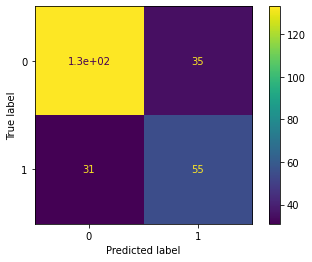

In [ ]:
cm = confusion_matrix(true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

There we have it - a pretty confusion matrix. The question is, how do we read this? On the left, we have the true labels and at the bottom, we have the predicted labels. We can see that for 168 records which are class 0, our model predicted 133 of them to be 0 (correctly classified) and 35 of them to be 1 (misclassified). As for the records which are class 1, of the 86 records, our model predicted 31 of them to be 0 (misclassified) and 55 of them to be 1 (correctly classified).

In terms of accuracy, let's see how our model performed across the 2 classes (i.e., 0 and 1).

In [ ]:
print('class 0 accuracy: {0:.3f}'.format(cm[0,0]/sum(cm[0])))
print('class 1 accuracy: {0:.3f}'.format(cm[1,1]/sum(cm[1])))

class 0 accuracy: 0.792
class 1 accuracy: 0.640


That's interesting. We're seeing that our model performs significantly better on class 0 than on class 1. Essentially, the accuracy we were seeing after training our model is not a true representation of what we're seeing when we split up our classes. Class 1 performs significantly worse than what we were hoping for.

## Attempting to Balance an Imbalanced Dataset
Above, we saw that our model results were not exactly being represented when we took a further look at our test results seperated by class. Why? What's the reason that our model was able to predict class 0 better than class 1? The answer is simple. If we look at our training data, we'll most likely see that we actually have signifcantly more data for the class 0 than we do for class 1.

Let's take a look at the training set to see if our assumption is valid.

In [ ]:
print('amount of records for class 0: {0:.0f}'.format(torch.sum((y_train==0)*1).item()))
print('amount of records for class 1: {0:.0f}'.format(torch.sum((y_train==1)*1).item()))

amount of records for class 0: 332
amount of records for class 1: 182


As we assumed, the classes are highly imbalanced. The amount of training data for class 1 is almost half that of class 0.

How do we fix this problem? Balancing an imbalanced class can be done in several ways, but in this article, we're going to be discussing a method which was [mentioned by Jeremey Howard (the founder of FastAI)]( https://twitter.com/jeremyphoward/status/1175177461920698368?lang=en). In his post, he indirectly refers to the paper [A systematic study of the class imbalance problem in convolutional neural networks](https://arxiv.org/abs/1710.05381). The method which the research paper mentions to have performed the best is that of oversampling. Although the paper discusses oversampling for convolution neural networks, in practice, it works just as well in other types of neural networks. The question you’re probably asking now is, “what’s oversampling?” Oversampling is a fancy way to say duplication of data. The data is oversampled by taking a random sample of the already existing data and duplicating it. After duplicating the random sample, it’s then appended to the training set. Something to keep in mind is that oversampling is only done on the training data and not the testing data. The best way to ensure this, is to first split the training and testing data, and then oversample only the training data.

The steps we'll use to accomplish the task of oversampling is by first splitting our dataset into training and testing sets, and then oversampling the imbalanced class (i.e., class 1) in the training set until it has the same number of records as the other class.

Let's see how we would execute this in code.

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')

X = df[df.columns[:-1]]
y = df['Outcome']
X = torch.tensor(X.values)
y = torch.tensor(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

###oversampling class 1###
difference = sum((y_train==0)*1) - sum((y_train==1)*1)
indices = torch.where(y_train==1)[0]
rand_subsample = torch.randint(0, len(indices), (difference,))
X_train, y_train = torch.cat((X_train, X_train[indices[rand_subsample]])), torch.cat((y_train, y_train[indices[rand_subsample]]))
##########################

scaler = StandardScaler()
scaler.fit(X_train)
X_train = torch.tensor(scaler.transform(X_train))
X_test = torch.tensor(scaler.transform(X_test))

Before we continue with the topic of oversampling, you probably realized the stratify parameter in the train_test_split function. The stratify parameter allows our test data to be representative of our training data, in terms of its balance. What does that mean? It means that our test data has the same ratio of class 0 and class 1 which exists in our training data. We passed it our target (i.e., y) to let it know that our data should be stratified in accordance with that feature. Stratifying our data should help us a bit, especially considering that our dataset is not only imbalanced, but it's also small.

Back to the topic at hand, as you can see, the oversampling was performed by finding the difference in size between class 0 and class 1 and then choosing a random set of indices for class 1, duplicating the random set of data and then appending it to the training set.

Now that we oversampled from class 1 (i.e., the imbalanced class), we should now have the same amount of data in both classes. Let's see if they're the same size.

In [ ]:
print('amount of records for class 0: {0:.0f}'.format(torch.sum((y_train==0)*1).item()))
print('amount of records for class 1: {0:.0f}'.format(torch.sum((y_train==1)*1).item()))

amount of records for class 0: 335
amount of records for class 1: 335


Awesome. We got that to work.

Now that we've balanced our dataset, let's throw it into PyTorch's DataLoader.

In [ ]:
train_data = PimaIndiansDiabetes(X_train, y_train)
test_data = PimaIndiansDiabetes(X_test, y_test)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

We'll also reset our model, making sure that we're not reusing our already train model.

In [ ]:
model = Model()
BCE = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

## Training Our Model on Our New Dataset

Finally, we're ready to train our model on our new (and hopefully improved) dataset. Let's see how it performs.

In [ ]:
test_result = [] 

for epoch in range(epochs):
    
    iteration_loss = 0.
    iteration_accuracy = 0.
    
    model.train()
    for i, data in enumerate(train_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())     
      
      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        

    if(epoch % print_epoch == 0):
        print('Train: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))    

    iteration_loss = 0.
    iteration_accuracy = 0.    

    model.eval()
    for i, data in enumerate(test_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())

      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      if(epoch == epochs-1):
        test_result.append((y, ((y_pred>=0.5)+0).reshape(1,-1)[0]))

    if(epoch % print_epoch == 0):
        print('Test: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train: epoch: 0 - loss: 0.69721; acc: 0.498
Test: epoch: 0 - loss: 0.65168; acc: 0.649
Train: epoch: 100 - loss: 0.66349; acc: 0.697
Test: epoch: 100 - loss: 0.65675; acc: 0.736
Train: epoch: 200 - loss: 0.61927; acc: 0.723
Test: epoch: 200 - loss: 0.61143; acc: 0.775
Train: epoch: 300 - loss: 0.56997; acc: 0.748
Test: epoch: 300 - loss: 0.56598; acc: 0.768
Train: epoch: 400 - loss: 0.54372; acc: 0.745
Test: epoch: 400 - loss: 0.53442; acc: 0.763
Train: epoch: 500 - loss: 0.52508; acc: 0.748
Test: epoch: 500 - loss: 0.51588; acc: 0.775
Train: epoch: 600 - loss: 0.51137; acc: 0.758
Test: epoch: 600 - loss: 0.50588; acc: 0.772
Train: epoch: 700 - loss: 0.50197; acc: 0.759
Test: epoch: 700 - loss: 0.50150; acc: 0.768
Train: epoch: 800 - loss: 0.50544; acc: 0.748
Test: epoch: 800 - loss: 0.49816; acc: 0.768
Train: epoch: 900 - loss: 0.49463; acc: 0.761
Test: epoch: 900 - loss: 0.49544; acc: 0.776
Train: epoch: 1000 - loss: 0.49227; acc: 0.764
Test: epoch: 1000 - loss: 0.49481; acc: 0.779


Before even dissecting our results, we're already seeing that there's more of a consistency between the train and test results. That's a good sign. If you rerun it, your results may vary, but it won't vary in its consistency between the train and test set.

Let's unzip our results from our last epoch and dissect them using a confusion matrix.

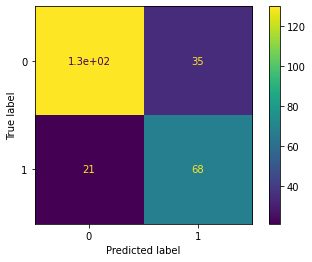

In [ ]:
true, pred = zip(*test_result)
true, pred = torch.cat(true), torch.cat(pred)

cm = confusion_matrix(true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

Having stratified our data, we see that class 1 has a little bit more data, but as we said above, the test set has the same balance as the training set.

As we can see from the confusion matrix, our class which wasn't oversampled is performing the same as before, which is good. Throwing more data of the positive class (i.e., class 1) didn't affect our model in its ability to comprehend the negative class (i.e., class 0). As for our class which was oversampled, I'm not really good at looking at numbers like that and making conclusions from it, so let's look at it in terms of accuracy.

In [ ]:
print('class 0 accuracy: {0:.3f}'.format(cm[0,0]/sum(cm[0])))
print('class 1 accuracy: {0:.3f}'.format(cm[1,1]/sum(cm[1])))

class 0 accuracy: 0.788
class 1 accuracy: 0.764


Looking at the accuracies, we can see that they're balanced, and that our accuracy from our model is now a representation of our dissection. Yay, oversampling worked!

## Why Does It Work?

It's interesting to see how a simple trick which may seem counterintuitive actually works. But why does it work? Let's try and understand. We have a large sample of the problem (i.e., our training data) and we're assuming that the data which was captured for this problem represents the problem well enough that if we understand our training set, then we should understand the problem. Now, if the imbalanced class is a good representation of the problem (which we assume it is), then any extra data that we get, should, in theory, resemble very closely with the already existing data. Keeping that in mind, if extra data would closely resemble the already existing data to a point that it looks like duplicate data, then duplicating the data should, theoretically, be a good substitute to collecting extra data.

I apologize because I know that the paragraph above was a mouthful. Reading it may be a little confusing, so make sure to go through it slowly if it didn’t make sense the first time. To conclude, the above is the exact thought process behind the idea of oversampling for imbalanced datasets.

## When Does It Not Work?

Throughout this article, we've touted oversampling as the saviour to an imbalanced dataset, but it wouldn't be fair to end the article without going over where it wouldn't be such a good idea. There may be many instances where oversampling may not be the best approach for an imbalanced dataset, but 3 situations come to mind:

1.	When it's possible and easy to correct an imbalanced class by collecting more data, then it's best to do so rather than oversampling the already existing data.
2.	If the data present contains a lot of bias to it (even though the data may be numerous), it's good to refrain from oversampling it. Rather, the correct approach would be to collect more data, even if it may be difficult to do so.
3.	In our example, we almost doubled our data. Doubling isn't usually recommended, so try to avoid oversampling if the gap between the classes is too large. How large is too large? I don't have a rule for you, but the best way to find out is to experiment with your data.

That concludes this article. I'm hoping that it's been useful and not too confusing. Make sure to go through it again if you struggled with some parts the first time.